In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from fafbseg import flywire
import pymaid
import navis
import numpy as np
from statannot import add_stat_annotation
import seaborn as sns

flywire.get_materialization_versions()

,expires_on,status,is_merged,time_stamp,datastack,id,version,valid
0,2023-09-23 04:10:00,AVAILABLE,False,2023-09-21 05:10:00,flywire_fafb_production,771,781,True
1,2023-10-18 04:10:00,AVAILABLE,False,2023-09-20 05:10:00,flywire_fafb_production,770,780,True
2,2121-11-10 07:10:00,AVAILABLE,False,2023-09-19 05:10:00,flywire_fafb_production,769,779,True
3,2023-10-04 04:10:00,AVAILABLE,False,2023-09-06 05:10:00,flywire_fafb_production,762,772,True
4,2121-11-10 07:10:00,AVAILABLE,True,2023-03-21 08:10:00,flywire_fafb_production,619,630,True
5,2121-11-10 07:10:00,AVAILABLE,True,2023-01-10 08:11:00,flywire_fafb_production,560,571,True
6,2121-11-10 07:10:00,AVAILABLE,True,2022-11-17 08:10:00,flywire_fafb_production,515,526,True
7,2121-02-18 08:10:00,AVAILABLE,True,2022-01-17 08:10:00,flywire_fafb_production,247,258,True


In [128]:
#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [129]:
#initialize empty dataframe
flyneurons=pd.DataFrame(columns=['id', 'total cable length', 'cable length in glom', 'unilateral feedforward', 'bilateral left feedforward', 'bilateral right feedforward', 'recurrent connections', 'glomerulus'])


In [130]:
#load DM1 .ply files
dm1_l=navis.read_mesh("/home/jb534/pymaid_scripts/aedes/aedes/glom_meshes/DM1_R.ply", output='volume')


In [131]:
dm1neurons=[720575940619419757,720575940629918762, 720575940632224031, 720575940637447514, 720575940614559163, 720575940614559163, 720575940622651389, 720575940631240296,720575940623942119, 720575940627253865, 720575940639427416, 720575940605328230, 720575940625821758, 720575940636187054, 720575940620574305, 720575940637472053, 720575940630496975, 720575940623993836, 720575940622281399, 720575940627996315, 720575940622276791, 720575940630664273, 720575940627316303,720575940629350782,720575940606001074, 720575940635562096, 720575940624223888, 720575940629918762, 720575940643980910, 720575940627526735, 720575940606001074, 720575940635562096, 720575940627253865, 720575940626779644, 720575940643980910, 720575940630496975]

In [132]:
dm1_pn=720575940624688363

In [133]:
flywire.supervoxels_to_roots(flyneurons, progress=True, dataset='production')

array([], shape=(0, 8), dtype=int64)

In [134]:
for n in dm1neurons:
    #get cable length in the glomerulus
    skel=flywire.skeletonize_neuron(n, progress=False)
    skel_involume=navis.in_volume(skel, dm1_l)

    #get feedforward connectivity in the glomerulus
    feedforward_connectivity=flywire.synapses.fetch_adjacency(skel, targets=dm1_pn, dataset='production', min_score=65, progress=True)

    #extract values from the dataframes
    feedforward_value=int(feedforward_connectivity.iloc[0])


    #get recurrent connectivity in the glomerulus
    recurrent_connectivity=flywire.synapses.fetch_adjacency(skel_involume,targets=dm1neurons, dataset='production', min_score=65, progress=True)
    sum_recurrent=recurrent_connectivity.iloc[0].sum()

    #append to the dataframe
    flyneurons=flyneurons.append({'id':n, 'total cable length':skel.cable_length, 'cable length in glom':skel_involume.cable_length, 'unilateral feedforward':feedforward_value, 'recurrent connections':sum_recurrent, 'glomerulus':'DM1'}, ignore_index=True)


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571
Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571
Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 571


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 630


In [135]:
flycsv=flyneurons.to_csv('/home/jb534/pymaid_scripts/aedes/aedes/csvs/flyneuron_cable_inglom.csv')

In [136]:
#Glomerulus V
#load .ply
v_l=navis.read_mesh("/home/jb534/pymaid_scripts/aedes/aedes/glom_meshes/V_R.ply", output='volume')


In [137]:
vneurons=[720575940642968776, 720575940627586091, 720575940626822916, 720575940621315293, 720575940617067305, 720575940614548765, 720575940617989417, 720575940633817405, 720575940614053149, 720575940614037533, 720575940612901807, 720575940626329993, 720575940620411764, 720575940614054685, 720575940629644375, 720575940620511732, 720575940623854311, 720575940627817260, 720575940614548253, 720575940614053405, 720575940612700450, 720575940626822916, 720575940638026842, 720575940607239947, 720575940633509949,720575940629424195, 720575940628499322, 720575940616923945, 720575940623771580, 720575940612704802, 720575940617650407, 720575940633802045, 720575940621192436, 720575940627890231]


In [138]:
v_bilateral_rightsoma=720575940626143806
v_bilateral_leftsoma=720575940630546540
v_unilateral=720575940637910106

In [139]:
for n in vneurons:
    #get cable length in the glomerulus
    skel=flywire.skeletonize_neuron(n, progress=False)
    skel_involume=navis.in_volume(skel, v_l)

    #get feedforward connectivity in the glomerulus
    feedforward_bilateral_rightsoma_connectivity=flywire.synapses.fetch_adjacency(skel, targets=v_bilateral_rightsoma, min_score=65, dataset='production', progress=True)
    feedforward_bilateral_leftsoma_connectivity=flywire.synapses.fetch_adjacency(skel, targets=v_bilateral_leftsoma, min_score=65, dataset='production', progress=True)
    feedforward_unilateral=flywire.synapses.fetch_adjacency(skel, targets=v_unilateral, dataset='production', min_score=60, progress=True)

    #extract values from the dataframes
    bilateral_leftsoma_value=int(feedforward_bilateral_leftsoma_connectivity.iloc[0])
    bilateral_rightsoma_value=int(feedforward_bilateral_rightsoma_connectivity.iloc[0])
    unilateral_value=int(feedforward_unilateral.iloc[0])


    #get recurrent connectivity in the glomerulus
    recurrent_connectivity=flywire.synapses.fetch_adjacency(skel_involume,targets=vneurons, min_score=65, dataset='production', progress=True)
    sum_recurrent=recurrent_connectivity.iloc[0].sum()

    #append to the dataframe
    flyneurons=flyneurons.append({'id':n, 'total cable length':skel.cable_length, 'cable length in glom':skel_involume.cable_length, 'unilateral feedforward':unilateral_value, 'bilateral left feedforward':bilateral_leftsoma_value, 'bilateral right feedforward':bilateral_rightsoma_value, 'recurrent connections':sum_recurrent, 'glomerulus':'V'}, ignore_index=True)

    

Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient
Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


Using deprecated pyarrow serialization method, please upgrade CAVEClient>=5.9.0 with pip install --upgrade caveclient


Using materialization version 781


In [140]:
#MD1
MD1OSNs = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD1OSNsALL = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron'], allow_partial = False, intersect = True)
MD1neurons = pymaid.get_neuron(MD1OSNs)
MD1neuronsALL = pymaid.get_neuron(MD1OSNsALL)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/11 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/11 [00:00<?, ?it/s]

Fetch neurons:   0%|          | 0/45 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/45 [00:00<?, ?it/s]

In [141]:
for n in MD1neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    print(skelid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    print(dlength)
    plength=prox.cable_length

    #feedforward connections
    feedforward = pymaid.adjacency_matrix(n, targets=295)
    feedforward_value=int(feedforward.iloc[0])

    #recurrent connections
    recurrent = pymaid.adjacency_matrix(n, targets=MD1neuronsALL)
    sum_recurrent=recurrent.iloc[0].sum()

    #append to dataframe
    flyneurons=flyneurons.append({'id':n, 'total cable length':n.cable_length, 'cable length in glom':dlength, 
    'unilateral feedforward':feedforward_value, 'recurrent connections': sum_recurrent, 'glomerulus':'Glomerulus 1'}, ignore_index=True)

7172


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


453680.44
7815


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


406781.8
1608


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


434659.94
873


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


569447.6
6736


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


445835.0
881


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


506129.0
6975


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


391274.06
324409


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


416095.0
953


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


529873.44
5021


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


284735.88
671
629597.1


In [142]:
flyneurons['cable length in glom']=flyneurons['cable length in glom']/1000
flyneurons

,id,total cable length,cable length in glom,unilateral feedforward,bilateral left feedforward,bilateral right feedforward,recurrent connections,glomerulus
0,720575940619419757,600303.713435,134.017044,81,NaN,NaN,43.0,DM1
1,720575940629918762,586441.875243,134.508685,53,NaN,NaN,77.0,DM1
2,720575940632224031,589470.920047,181.379494,117,NaN,NaN,61.0,DM1
3,720575940637447514,611133.654214,154.915112,89,NaN,NaN,46.0,DM1
4,720575940614559163,672171.160246,150.689067,84,NaN,NaN,79.0,DM1
...,...,...,...,...,...,...,...,...
76,type CatmaidNeuron\nname ...,536363.625000,391.274063,145,NaN,NaN,333.0,Glomerulus 1
77,type CatmaidNeuron\nname ...,477346.125000,416.095000,184,NaN,NaN,294.0,Glomerulus 1
78,type CatmaidNeuron\nname ...,622672.937500,529.873438,151,NaN,NaN,303.0,Glomerulus 1
79,type CatmaidNeuron\nname ...,366482.375000,284.735875,89,NaN,NaN,148.0,Glomerulus 1


In [143]:
#mean and std for kicks
# 
DM1recurrent=flyneurons.loc[flyneurons['glomerulus']=='DM1']['recurrent connections']
print(np.mean(DM1recurrent))
print(np.std(DM1recurrent))

53.388888888888886
17.22607483790163


In [144]:
Vrecurrent=flyneurons.loc[flyneurons['glomerulus']=='V']['recurrent connections']
print(np.mean(Vrecurrent))
print(np.std(Vrecurrent))

47.911764705882355
23.854174190224608


In [145]:
MD1recurrent=flyneurons.loc[flyneurons['glomerulus']=='Glomerulus 1']['recurrent connections']
print(np.mean(MD1recurrent))
print(np.std(MD1recurrent))

285.54545454545456
52.838284392291364


In [146]:
MD1recurrent

70    332.0
71    287.0
72    238.0
73    298.0
74    300.0
75    347.0
76    333.0
77    294.0
78    303.0
79    148.0
80    261.0
Name: recurrent connections, dtype: float64

In [147]:
flycsv=flyneurons.to_csv('/home/jb534/pymaid_scripts/aedes/aedes/csvs/flyneuron_cable_inglom.csv')

In [148]:
flyneurons.loc[flyneurons['glomerulus']=='DM1']['recurrent connections']

0     43.0
1     77.0
2     61.0
3     46.0
4     79.0
5     79.0
6     44.0
7     49.0
8     45.0
9     85.0
10    34.0
11    39.0
12    38.0
13    51.0
14    44.0
15    30.0
16    75.0
17    30.0
18    28.0
19    38.0
20    53.0
21    45.0
22    29.0
23    37.0
24    75.0
25    49.0
26    51.0
27    77.0
28    56.0
29    43.0
30    75.0
31    49.0
32    85.0
33    52.0
34    56.0
35    75.0
Name: recurrent connections, dtype: float64

In [149]:
from seaborn.categorical import _ViolinPlotter
class MyVPlot(_ViolinPlotter):
    def draw_quartiles(self, ax, data, support, density, center, split=False, color='k'):
        """Draw the quartiles as lines at width of density."""
        q50 = np.mean(data)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth, color=color)

def my_violinplot2(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                  bw="scott", cut=0, scale="area", scale_hue=True, gridsize=100,
                  width=.8, inner="quartiles", split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=.75,alpha=1,
                  ax=None, edgecolor=None, **kwargs):

    plotter = MyVPlot(x, y, hue, data, order, hue_order,
                      bw, cut, scale, scale_hue, gridsize,
                      width, inner, split, dodge, orient, linewidth,
                      color, palette, saturation)
    if ax is None:
        ax = plt.gca()

    plotter.plot(ax)
    # change outlines
    colors=["indigo", "darkorange", "violet"]
    for idx, violin in enumerate(ax.collections):
        violin.set_edgecolor(colors[idx])
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_color('k')
    return ax

V v.s. DM1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.336e-06 U_stat=1.019e+03
DM1 v.s. Glomerulus 1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.078e-06 U_stat=0.000e+00
V v.s. Glomerulus 1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.522e-06 U_stat=0.000e+00


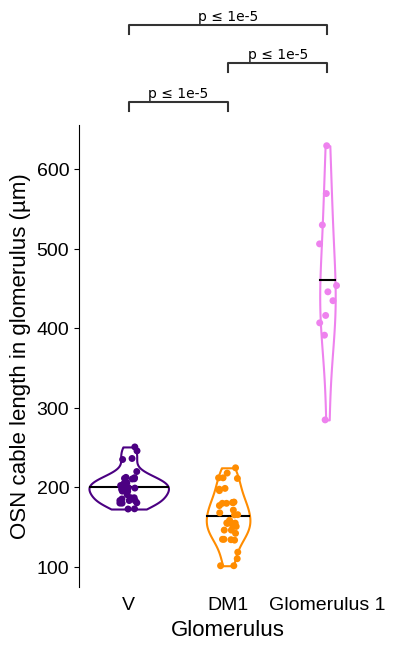

In [150]:
#make cable length plot with annotations, from dataframe
x = "glomerulus"
y = "cable length in glom"
order = ['V', 'DM1', 'Glomerulus 1']
plt.figure(figsize=(6,6))
ax = my_violinplot2(data=flyneurons, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=flyneurons, x=x, y=y, order=order, palette=["indigo", "darkorange", "violet"])
ax.set_xlabel('Glomerulus', size=16, fontname="Liberation Sans")
ax.set_ylabel('OSN cable length in glomerulus (µm)', size=16, fontname="Liberation Sans")
plt.xticks(fontsize=14, fontname="Liberation Sans")
plt.yticks(fontsize=14, fontname="Liberation Sans")
ax.set_aspect(0.008)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=flyneurons, x=x, y=y, order=order,
                    box_pairs=[("V", "DM1"), ("V", "Glomerulus 1"), ("DM1", "Glomerulus 1")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/cablelength_MD1_DM1_V.svg', format="svg")
plt.show()

V v.s. DM1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.263e-01 U_stat=5.120e+02
DM1 v.s. Glomerulus 1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.052e-06 U_stat=0.000e+00
V v.s. Glomerulus 1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.513e-06 U_stat=0.000e+00


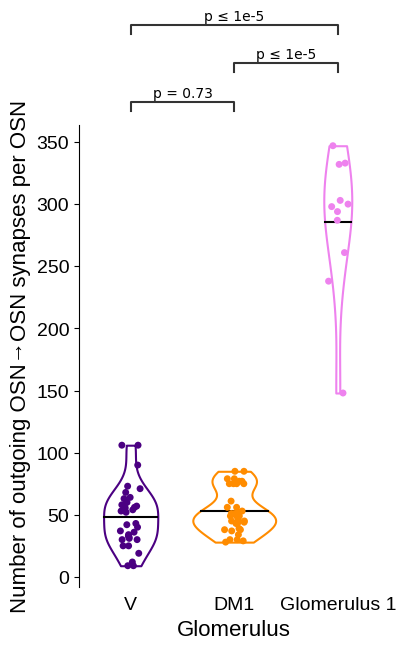

In [151]:
#make plot for recurrent connectivity
x = "glomerulus"
y = "recurrent connections"
order = ['V', 'DM1', 'Glomerulus 1']
plt.figure(figsize=(6,6))
ax = my_violinplot2(data=flyneurons, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=flyneurons, x=x, y=y, order=order, palette=["indigo", "darkorange", "violet"])
ax.set_xlabel('Glomerulus', size=16, fontname="Liberation Sans")
ax.set_ylabel('Number of outgoing OSN→OSN synapses per OSN', size=16, fontname="Liberation Sans")
plt.xticks(fontsize=14, fontname="Liberation Sans")
plt.yticks(fontsize=14, fontname="Liberation Sans")
ax.set_aspect(0.012)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=flyneurons, x=x, y=y, order=order,
                    box_pairs=[("V", "DM1"), ("V", "Glomerulus 1"), ("DM1", "Glomerulus 1")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/recurrent_fly.svg', format="svg")
plt.show()

In [152]:
#turn feedforward columns into lists, then to a dataframe.

#v bilateral left
v_bilateral_left_final=[]
v_bilateral_left=flyneurons["bilateral left feedforward"].tolist()
for i in v_bilateral_left:
  if str(i) != 'nan':
    v_bilateral_left_final.append(i)
print(v_bilateral_left_final)

[57.0, 37.0, 40.0, 13.0, 33.0, 49.0, 40.0, 37.0, 38.0, 31.0, 8.0, 3.0, 1.0, 8.0, 14.0, 33.0, 10.0, 42.0, 42.0, 37.0, 14.0, 40.0, 33.0, 20.0, 27.0, 23.0, 26.0, 22.0, 25.0, 20.0, 18.0, 24.0, 10.0, 7.0]


In [153]:
#v bilateral right
v_bilateral_right_final=[]
v_bilateral_right=flyneurons["bilateral right feedforward"].tolist()
for i in v_bilateral_right:
  if str(i) != 'nan':
    v_bilateral_right_final.append(i)
print(v_bilateral_right_final)

[46.0, 25.0, 33.0, 19.0, 43.0, 51.0, 63.0, 43.0, 38.0, 44.0, 19.0, 6.0, 2.0, 9.0, 23.0, 16.0, 14.0, 39.0, 37.0, 35.0, 30.0, 33.0, 39.0, 25.0, 27.0, 27.0, 41.0, 24.0, 35.0, 23.0, 26.0, 20.0, 21.0, 7.0]


In [154]:
#v unilateral
Vdf=flyneurons.loc[flyneurons['glomerulus']=='V']
v_unilateral=Vdf['unilateral feedforward'].tolist()

In [155]:
#DM1 feedforward list
DM1_df=flyneurons.loc[flyneurons['glomerulus']=='DM1']
DM1_feedforward=DM1_df['unilateral feedforward'].tolist()

In [156]:
#Glomerulus 1 list
Glom1_df=flyneurons.loc[flyneurons['glomerulus']=='Glomerulus 1']
Glom1_feedforward=Glom1_df['unilateral feedforward'].tolist()

In [157]:
#make nicer dataframe

data_dict = {"V Bilateral Right Soma": v_bilateral_right_final,"V Bilateral Left Soma": v_bilateral_left_final, "V Unilateral":v_unilateral, "DM1 Unilateral":DM1_feedforward, "1 Unilateral": Glom1_feedforward}
pre_df = {"uPN": [], "feedforward synapses": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["uPN"].extend(glom_list)    
    pre_df["feedforward synapses"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)

In [158]:
from seaborn.categorical import _ViolinPlotter
class MyVPlot(_ViolinPlotter):
    def draw_quartiles(self, ax, data, support, density, center, split=False, color='k'):
        """Draw the quartiles as lines at width of density."""
        q50 = np.mean(data)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth, color=color)

def my_violinplot_5(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                  bw="scott", cut=0, scale="area", scale_hue=True, gridsize=100,
                  width=.8, inner="quartiles", split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=.75,alpha=1,
                  ax=None, edgecolor=None, **kwargs):

    plotter = MyVPlot(x, y, hue, data, order, hue_order,
                      bw, cut, scale, scale_hue, gridsize,
                      width, inner, split, dodge, orient, linewidth,
                      color, palette, saturation)
    if ax is None:
        ax = plt.gca()

    plotter.plot(ax)
    # change outlines
    colors=["blueviolet", "purple", 'indigo', "darkorange", "violet"]
    for idx, violin in enumerate(ax.collections):
        violin.set_edgecolor(colors[idx])
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_color('k')
    return ax

V Bilateral Left Soma v.s. V Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.045e-08 U_stat=1.037e+03
DM1 Unilateral v.s. 1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.647e-05 U_stat=1.250e+01
V Unilateral v.s. 1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.052e-06 U_stat=0.000e+00
V Bilateral Left Soma v.s. DM1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.500e-11 U_stat=2.400e+01
V Bilateral Left Soma v.s. 1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.147e-06 U_stat=0.000e+00


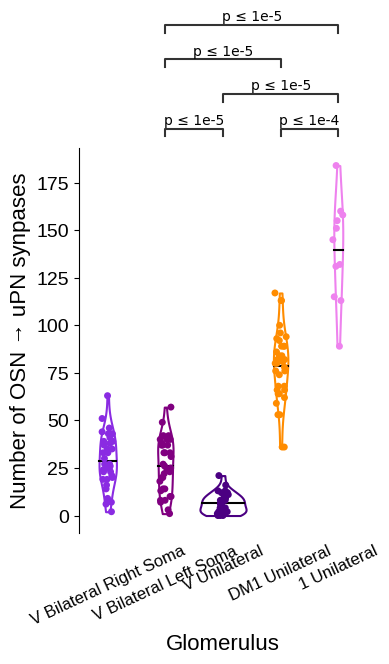

In [159]:
#make plot with annotations, from dataframe
x = "uPN"
y = "feedforward synapses"
order = ['V Bilateral Right Soma', 'V Bilateral Left Soma', "V Unilateral", 'DM1 Unilateral', '1 Unilateral']
plt.figure(figsize=(5,5))
ax = my_violinplot_5(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["blueviolet", "purple", 'indigo', "darkorange", "violet"])
ax.set_xlabel('Glomerulus', size=16, fontname="Liberation Sans")
ax.set_ylabel('Number of OSN → uPN synpases', size=16, fontname="Liberation Sans")
#ax.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_aspect(0.033)
plt.xticks(rotation=25)
plt.xticks(fontsize=12, fontname="Liberation Sans")
plt.yticks(fontsize=14, fontname="Liberation Sans")
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("V Bilateral Left Soma", "1 Unilateral"), ("V Bilateral Left Soma", "V Unilateral"), ("1 Unilateral", "V Unilateral"), ("V Bilateral Left Soma", "DM1 Unilateral"), ("DM1 Unilateral", "1 Unilateral")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/VDM1MD1feedforward.svg', format="svg")
plt.show()

In [160]:
df=pd.read_csv('/home/jb534/pymaid_scripts/aedes/aedes/csvs/flyneuron_cable_inglom.csv')
df

,Unnamed: 0,id,total cable length,cable length in glom,unilateral feedforward,bilateral left feedforward,bilateral right feedforward,recurrent connections,glomerulus
0,0,720575940619419757,600303.713435,134.017044,81,NaN,NaN,43.0,DM1
1,1,720575940629918762,586441.875243,134.508685,53,NaN,NaN,77.0,DM1
2,2,720575940632224031,589470.920047,181.379494,117,NaN,NaN,61.0,DM1
3,3,720575940637447514,611133.654214,154.915112,89,NaN,NaN,46.0,DM1
4,4,720575940614559163,672171.160246,150.689067,84,NaN,NaN,79.0,DM1
...,...,...,...,...,...,...,...,...,...
76,76,type CatmaidNeuron\nname ...,536363.625000,391.274063,145,NaN,NaN,333.0,Glomerulus 1
77,77,type CatmaidNeuron\nname ...,477346.125000,416.095000,184,NaN,NaN,294.0,Glomerulus 1
78,78,type CatmaidNeuron\nname ...,622672.937500,529.873438,151,NaN,NaN,303.0,Glomerulus 1
79,79,type CatmaidNeuron\nname ...,366482.375000,284.735875,89,NaN,NaN,148.0,Glomerulus 1


In [161]:
#create new column for density of recurrent synapses in glomerulus
df['recurrent_density']=(df['recurrent connections']/df['cable length in glom'])

#create new columns for feedforward synapse densities for each uPN type
df['unilateral feedforward density']=df['unilateral feedforward']/df['cable length in glom']
df['bilateral left feedforward density']=df['bilateral left feedforward']/df['cable length in glom']
df['bilateral right feedforward density']=df['bilateral right feedforward']/df['cable length in glom']


In [162]:
#create lists for feedforward connectivity densities

#v unilateral uPN density
Vdf=df.loc[df['glomerulus']=='V']
v_unilateral_density=Vdf['unilateral feedforward density'].tolist()

#v left bilateral and right bilateral
v_bilateral_left_density=Vdf['bilateral left feedforward density'].tolist()
v_bilateral_right_density=Vdf['bilateral right feedforward density'].tolist()

#DM1 OSN --> uPN density
DM1df=df.loc[df['glomerulus']=='DM1']
dm1_feedforward_density=DM1df['unilateral feedforward density'].tolist()

#Glom 1  OSN --> uPN density
Glom1df=df.loc[df['glomerulus']=='Glomerulus 1']
glom1_feedforward_density=Glom1df['unilateral feedforward density'].tolist()

In [163]:
#make nicer dataframe

data_dict = {"V Bilateral Right Soma": v_bilateral_right_density,"V Bilateral Left Soma": v_bilateral_left_density, "V Unilateral":v_unilateral_density, "DM1 Unilateral":dm1_feedforward_density, "1 Unilateral": glom1_feedforward_density}
pre_df = {"uPN": [], "feedforward synapses density": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["uPN"].extend(glom_list)    
    pre_df["feedforward synapses density"].extend(dists)

feedforward_density = pd.DataFrame.from_dict(pre_df)

V Bilateral Left Soma v.s. V Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.950e-07 U_stat=1.026e+03
DM1 Unilateral v.s. 1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.747e-04 U_stat=3.590e+02
V Unilateral v.s. 1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.189e-06 U_stat=0.000e+00
V Bilateral Left Soma v.s. DM1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.332e-12 U_stat=0.000e+00
V Bilateral Left Soma v.s. 1 Unilateral: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.287e-05 U_stat=1.800e+01


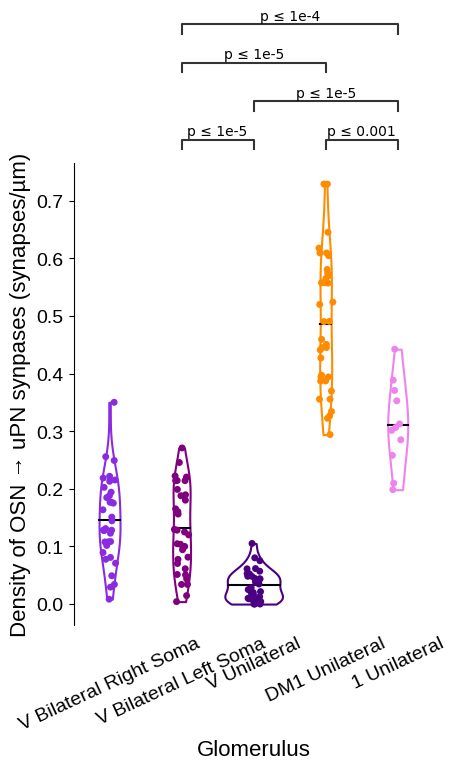

In [164]:
#plot feedforward connectivity denstiy
x = "uPN"
y = "feedforward synapses density"
order = ['V Bilateral Right Soma', 'V Bilateral Left Soma', "V Unilateral", 'DM1 Unilateral', '1 Unilateral']
plt.figure(figsize=(6,6))
ax = my_violinplot_5(data=feedforward_density, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=feedforward_density, x=x, y=y, order=order, palette=["blueviolet", "purple", 'indigo', "darkorange", "violet"])
ax.set_xlabel('Glomerulus', size=16, fontname="Liberation Sans")
ax.set_ylabel('Density of OSN → uPN synpases (synapses/µm)', size=16, fontname="Liberation Sans")
#ax.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_aspect(8)
plt.xticks(rotation=25)
plt.xticks(fontsize=14, fontname="Liberation Sans")
plt.yticks(fontsize=14, fontname="Liberation Sans")
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=feedforward_density, x=x, y=y, order=order,
                    box_pairs=[("V Bilateral Left Soma", "1 Unilateral"), ("V Bilateral Left Soma", "V Unilateral"), ("1 Unilateral", "V Unilateral"), ("V Bilateral Left Soma", "DM1 Unilateral"), ("DM1 Unilateral", "1 Unilateral")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/VDM1MD1feedforward_density.svg', format="svg")
plt.show()

V v.s. DM1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.174e-02 U_stat=3.660e+02
DM1 v.s. Glomerulus 1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.680e-05 U_stat=3.000e+01
V v.s. Glomerulus 1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.413e-06 U_stat=1.000e+01


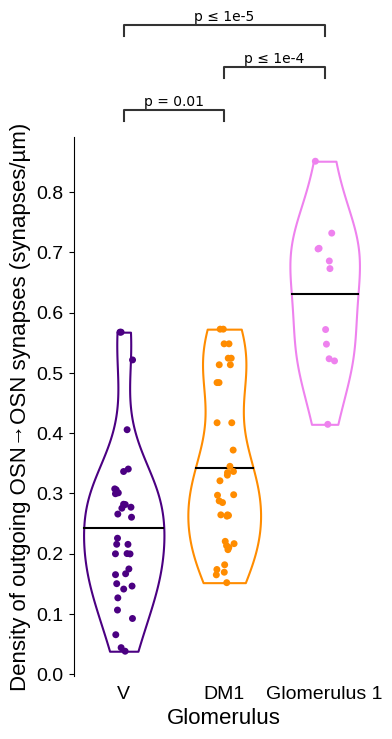

In [175]:
#make plot for recurrent connectivity DENSITY
x = "glomerulus"
y = "recurrent_density"
order = ['V', 'DM1', 'Glomerulus 1']
plt.figure(figsize=(7,7))
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["indigo", "darkorange", "violet"])
ax.set_xlabel('Glomerulus', size=16, fontname="Liberation Sans")
ax.set_ylabel('Density of outgoing OSN→OSN synapses (synapses/µm)', size=16, fontname="Liberation Sans")
plt.xticks(fontsize=14, fontname="Liberation Sans")
plt.yticks(fontsize=14, fontname="Liberation Sans")
ax.set_aspect(6)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("V", "DM1"), ("V", "Glomerulus 1"), ("DM1", "Glomerulus 1")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/recurrent_density_fly.svg', format="svg")
plt.show()